# Logistic Regression 

In this notebook I will be creating and optimising a binary classification model using Logisitic Regression. The data has already been cleaned and any categorical data has been converted into numerical data as shown below.

In [63]:
 
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv('my_full_data.csv')
df 

,Unnamed: 0,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,open_acc,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,application_type,tax_liens
0,0,68387134,2500.0,0,17.27,89.47,3,1,1,50000.0,...,9,9,17.60,7.0,22.0,1,669.0,665.0,0,0.0
1,1,66615254,7200.0,0,17.27,257.67,3,9,4,20000.0,...,2,18,13.21,8.0,17.0,1,549.0,545.0,0,0.0
2,2,68376899,16000.0,0,10.78,522.16,1,5,5,63000.0,...,2,33,35.19,12.0,22.0,1,594.0,590.0,0,0.0
3,3,68366850,16000.0,0,5.32,481.84,0,8,1,96000.0,...,2,22,14.45,23.0,38.0,1,744.0,740.0,0,0.0
4,4,67195202,13000.0,1,16.59,320.23,3,10,5,40000.0,...,2,11,16.74,6.0,17.0,1,569.0,565.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,26113,90441274,12000.0,0,13.99,410.08,2,0,5,47000.0,...,1,25,31.79,13.0,28.0,0,754.0,750.0,0,0.0
26114,26114,90404436,25000.0,1,25.69,743.94,5,6,1,70000.0,...,9,5,15.10,9.0,19.0,0,499.0,0.0,0,0.0
26115,26115,90393111,16000.0,0,12.79,537.49,2,1,4,48000.0,...,2,4,33.60,11.0,17.0,0,699.0,695.0,0,0.0
26116,26116,90304259,35000.0,1,15.59,843.53,2,1,1,180000.0,...,2,9,13.09,17.0,31.0,0,714.0,710.0,0,0.0


In [44]:
print(df['loan_status']) #Our target variable

0        1
1        0
2        0
3        1
4        0
        ..
26113    1
26114    0
26115    1
26116    1
26117    1
Name: loan_status, Length: 26118, dtype: int64


## Baseline model  

Our data is ready to be split into our training and testing data. I will perform the basic Logisitic Regression classsifier from the `sklearn` package which later on in this notebook I will look to optimise it via comaprison with performance metrics. First I will take our target variable the loan status and drop it from the data, perform our cross validation and examine performance and information such as the shape of each split, the model accuracy, classfication report and confusion matrix.

In [9]:
y = df['loan_status'] 
X = df.drop(columns=['id', 'loan_status'])  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((20894, 20), (5224, 20))

In [51]:
model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model accuracy score: 0.8386

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.39      0.51      1144
           1       0.85      0.97      0.90      4080

    accuracy                           0.84      5224
   macro avg       0.80      0.68      0.71      5224
weighted avg       0.83      0.84      0.82      5224

Confusion Matrix:
 [[ 441  703]
 [ 140 3940]]


It might be useful to see how represent a normalised version of this confusion matrix to compare easily with other models. We can see below that its performance with regards to prectiting when a loan will be paid is far superior to predcting when a loan will not be paid.

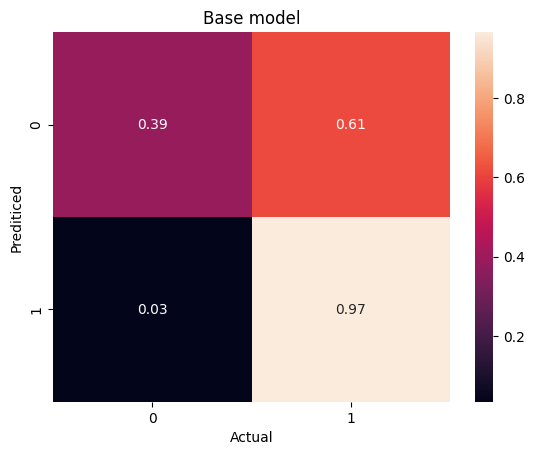

In [60]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2f',)
plt.title('Base model')
plt.xlabel('Actual')
plt.ylabel('Prediticed')
plt.show()

We must also check if the model accuracy is good by comapring it to the accuracy of a model that only predicts the most popular option, in this case the loan being paid back. 

In [62]:
null_accuracy = (4080/(4080+1144))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7810


Model accuracy is higher so we can say that it is performing well, but the difference is only around 5% which we can hopefully improve

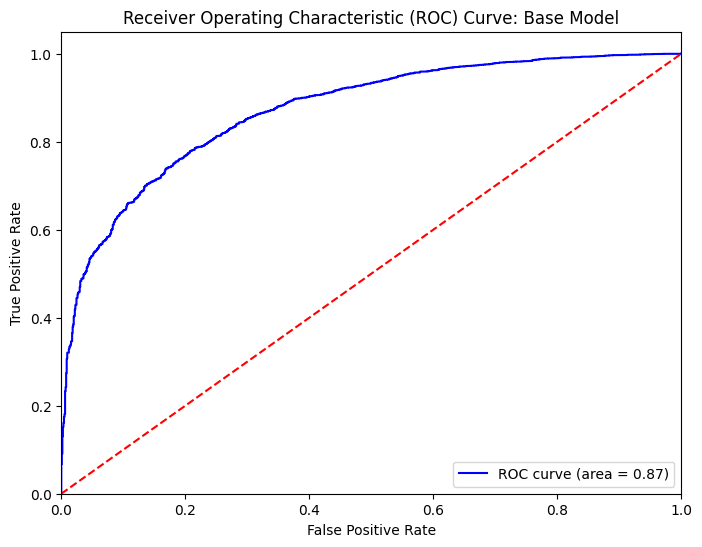

In [67]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Base Model')
plt.legend(loc='lower right')
plt.show()

This concludes our analysis of how the baseline model performs without any adjustments to the data, predictive paramteres used etc. We will look to improve metrics such as the AUC, True Negative rate and others despite an inital overall good model performance to begin with.